In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [ ]:
DF = pd.read_csv('FastFood.csv')

In [7]:
DF.head()

,FastFoodNames,Sales
0,1,2600.0
1,1,1483.8
2,1,1195.0
3,1,1470.0
4,1,903.4


In [4]:
DF.describe()

,FastFoodNames,Sales
count,24.00000,24.000000
mean,2.50000,1279.108333
std,1.14208,737.871272
min,1.00000,345.000000
25%,1.75000,866.350000
50%,2.50000,1088.600000
75%,3.25000,1477.200000
max,4.00000,3158.000000


In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FastFoodNames  24 non-null     int64  
 1   Sales          24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [9]:
DF.PriceLevel = pd.Categorical(DF.FastFoodNames)

C:\Users\King\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [10]:
DF.PriceLevel.value_counts

<bound method Categorical.value_counts of [1, 1, 1, 1, 1, ..., 4, 4, 4, 4, 4]
Length: 24
Categories (4, int64): [1, 2, 3, 4]>

In [11]:
formula = 'Sales ~ C(FastFoodNames)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                    df        sum_sq        mean_sq         F    PR(>F)
C(FastFoodNames)   3.0  2.771659e+06  923886.427222  1.894999  0.162978
Residual          20.0  9.750783e+06  487539.152833       NaN       NaN


<AxesSubplot:xlabel='FastFoodNames', ylabel='Sales'>

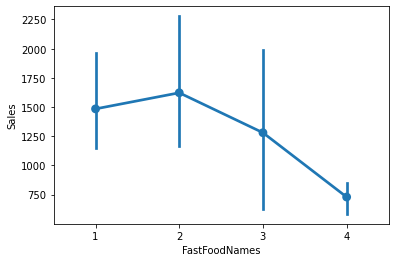

In [14]:
sns.pointplot(x='FastFoodNames', y='Sales', data=DF)

<AxesSubplot:xlabel='FastFoodNames', ylabel='Sales'>

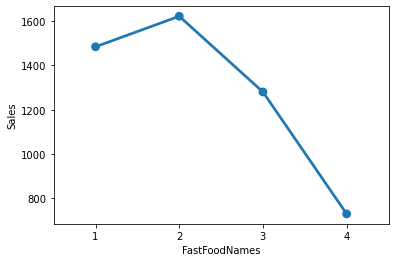

In [15]:
sns.pointplot(x='FastFoodNames', y='Sales', data=DF, ci=None)